In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from google.colab import files
from scipy.stats import spearmanr

In [61]:
rcParams['figure.figsize'] = 5,5
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14

In [2]:
from numpy.lib.shape_base import dsplit
uploaded = files.upload()
ds = pd.read_csv('Database_preprocessed.csv')
ds.describe()

Saving Database_preprocessed.csv to Database_preprocessed (2).csv


,Unnamed: 0,Si,Al,Fe,Log(initial permeability),Log(max permeability),Losses,Remanent induction,Coercivity,Magnetic polarization,Resistivity
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,122.000000,122.000000,122.000000,66.000000,105.000000
mean,73.500000,6.550676,5.154730,88.294595,6.977892,9.023725,989.065574,5490.163934,27.953870,13649.333333,87.801905
std,42.868014,4.202065,3.820734,5.062383,1.309204,1.415394,1026.161247,2633.380753,27.547993,5124.937143,31.036982
min,0.000000,0.000000,0.000000,79.700000,0.587787,0.587787,16.000000,130.000000,1.193662,176.000000,10.500000
25%,36.750000,2.975000,2.125000,84.200000,6.309918,8.354674,319.500000,3300.000000,11.339790,10765.000000,71.600000
50%,73.500000,6.700000,4.800000,87.250000,6.897654,9.176693,814.500000,5370.000000,21.883805,14135.000000,89.800000
75%,110.250000,9.825000,7.400000,92.050000,7.495542,9.667917,1456.750000,8000.000000,38.794017,17885.000000,98.500000
max,147.000000,14.800000,13.700000,100.000000,10.465956,11.995352,8640.000000,9800.000000,230.774667,21520.000000,182.500000


# Magnetic polarization

In [142]:
P = ds[['Si', 'Al', 'Fe', 'Magnetic polarization']]
P = P.dropna(axis=0, how='any')
P.drop(labels = [147],axis = 0, inplace = True)


In [143]:
x = P['Fe']
y = P['Magnetic polarization']
non_zero_count = len(x)

In [144]:
coef, p = spearmanr(P['Fe'], P['Magnetic polarization'])
print(coef)

0.9826666901410422


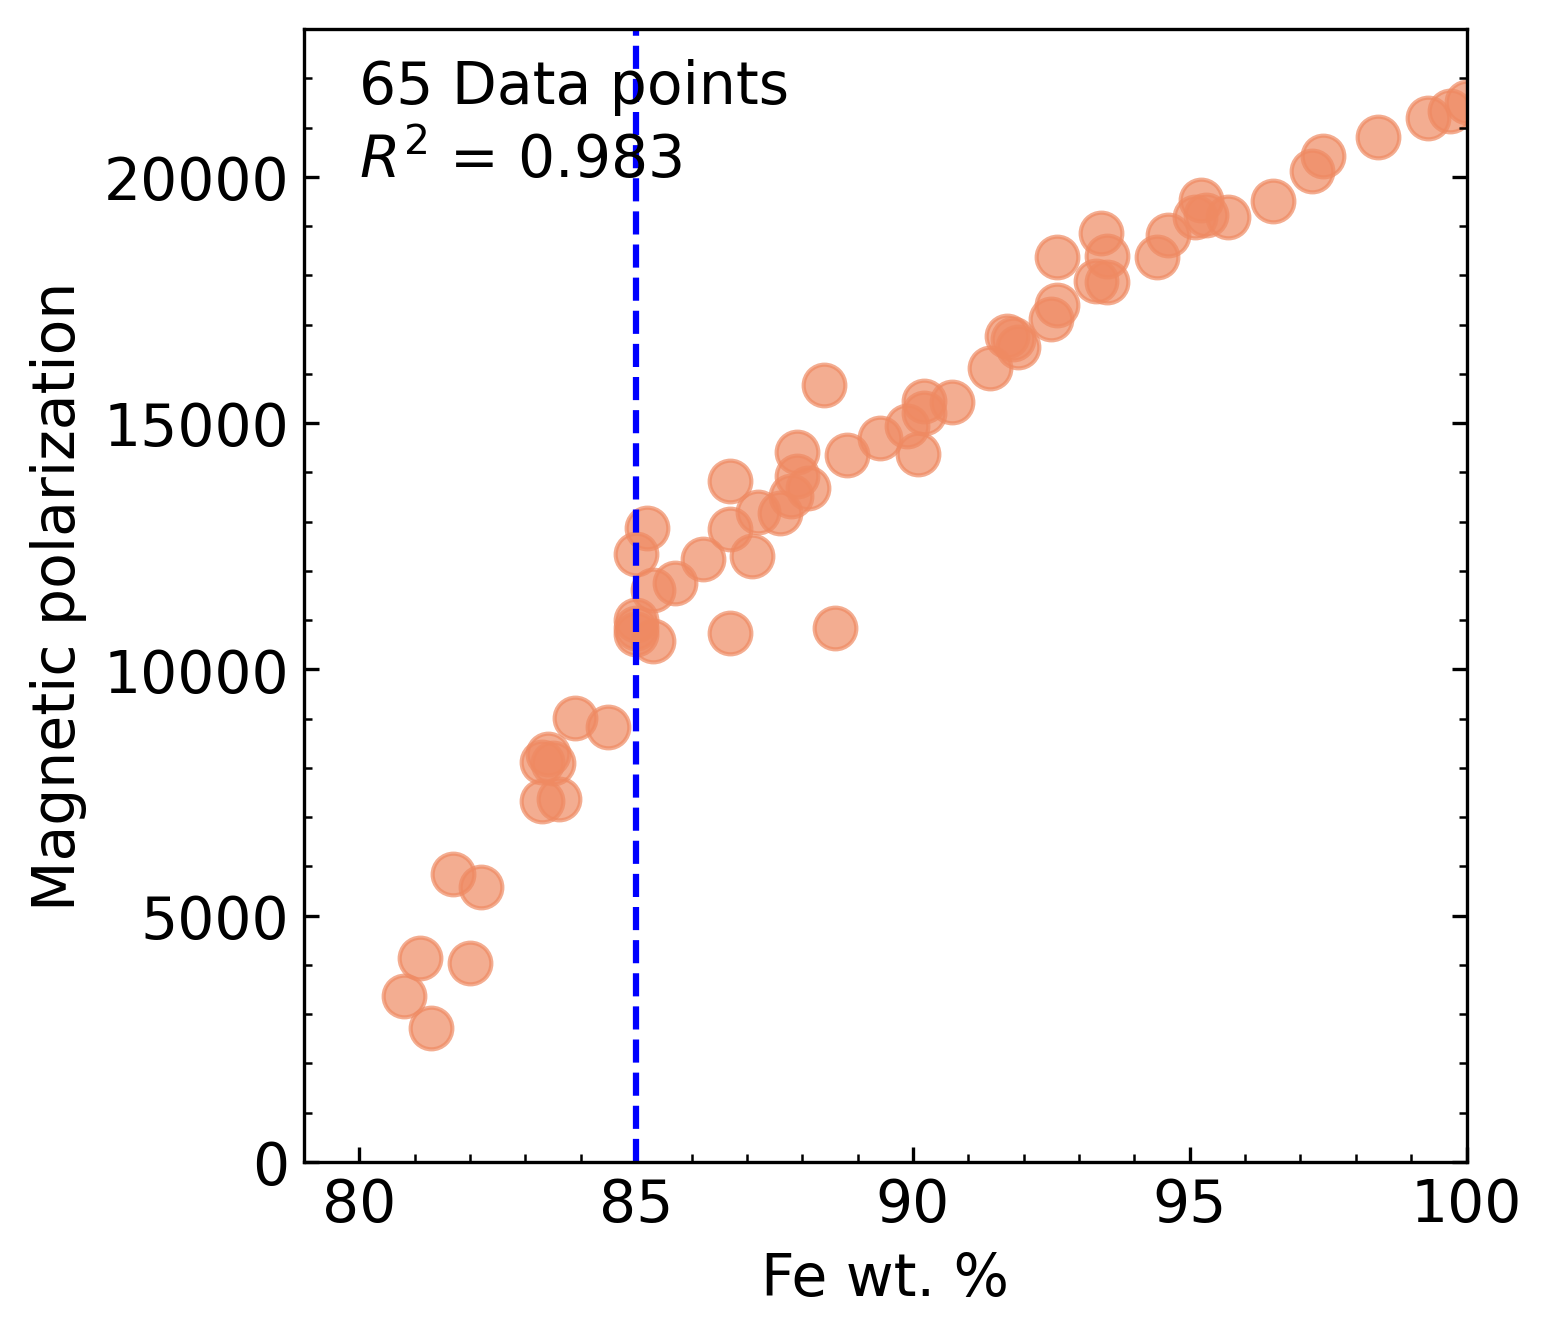

In [145]:
fig, ax = plt.subplots()
plt.scatter(x, y, s=100, color ='#ef8a62', alpha=0.7, label=None)
plt.label='{0:.0f} Data points'.format(non_zero_count)
plt.xlabel('Fe wt. %')
ax.text(80, 21500, s='{0:.0f} Data points'.format(non_zero_count))
ax.text(80, 20000, s='$R^2$ = {0:.3f}'.format(coef))
plt.ylabel('Magnetic polarization')
plt.tick_params()
plt.xlim((79,100))
plt.ylim((0,23000))
plt.minorticks_on()
plt.tick_params(direction='in', which='major', right=True)
plt.tick_params(direction='in', which='minor', left=True, right=True)

# Initial permeability

In [106]:
IP = ds[['Si', 'Al', 'Fe', 'Log(initial permeability)']]



In [107]:
x = IP['Fe']
y = IP['Log(initial permeability)']
non_zero_count = len(x)

In [108]:
coef, p = spearmanr(IP['Fe'], IP['Log(initial permeability)'])
print(coef)

-0.36048788450852703


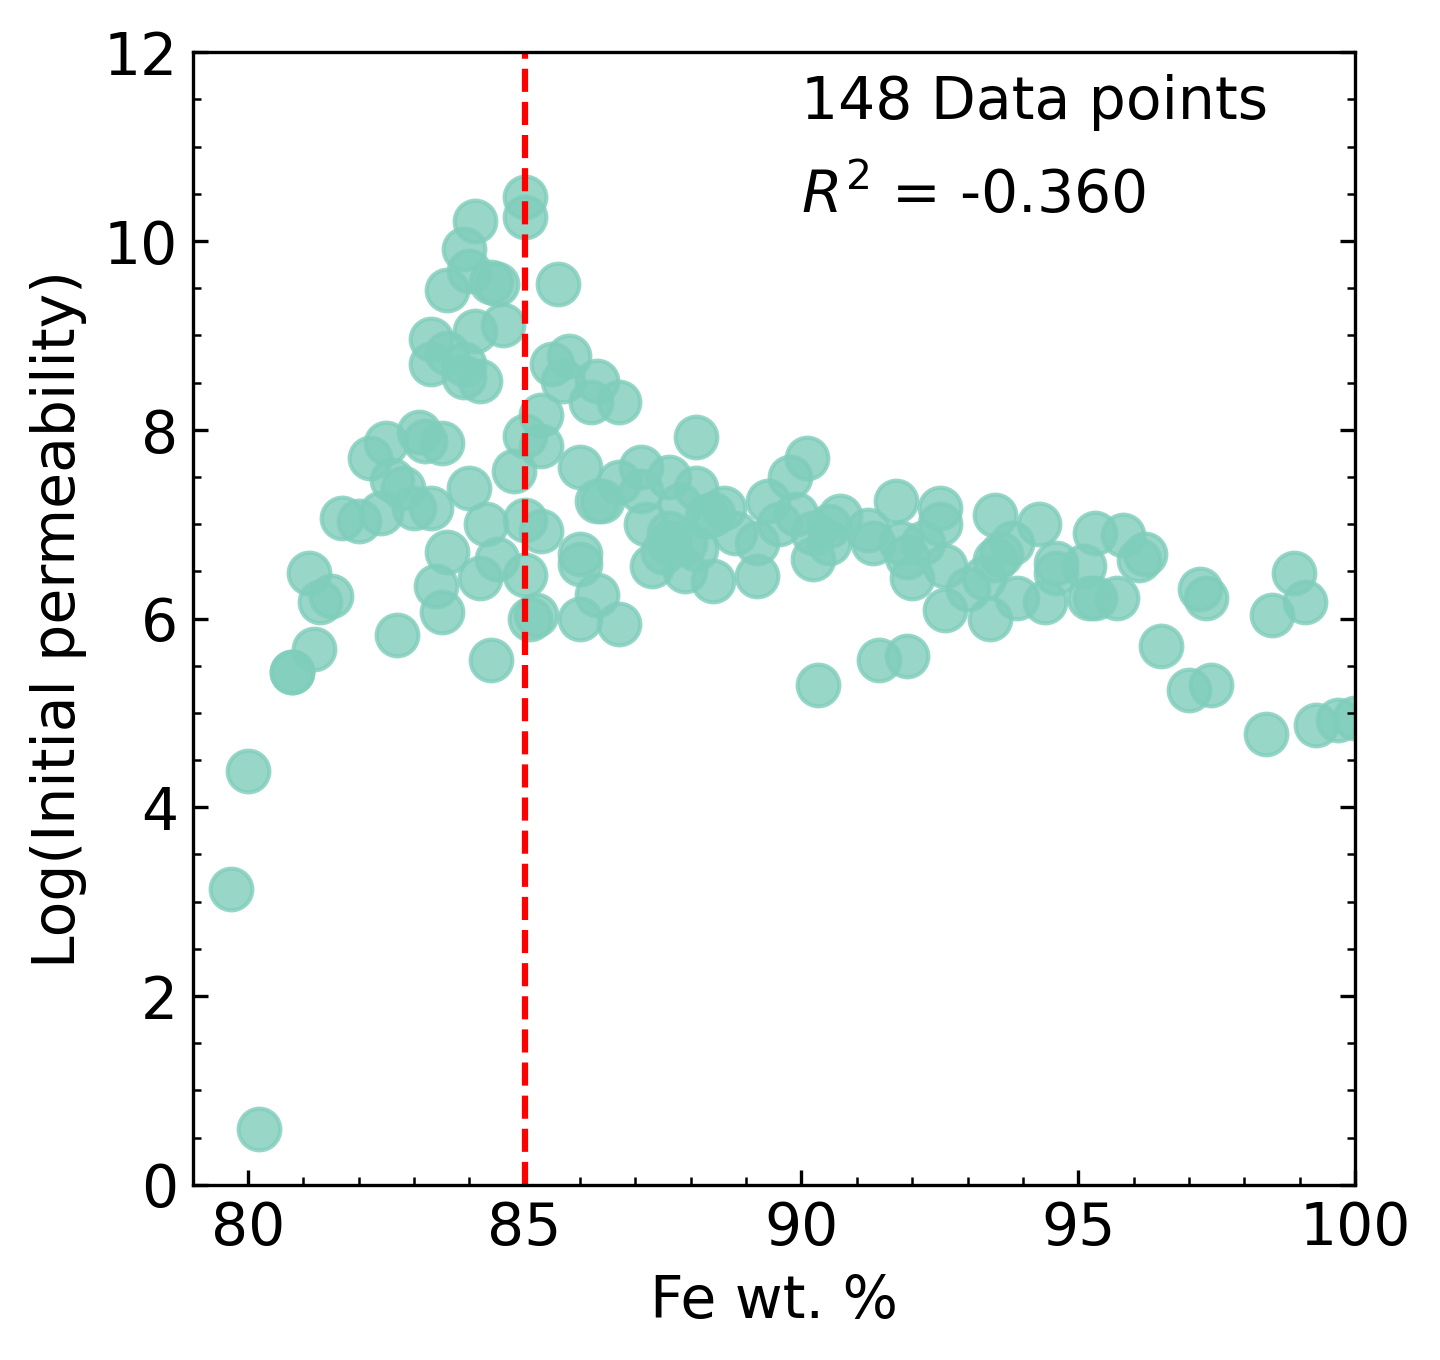

In [114]:
fig, ax = plt.subplots()
plt.scatter(x, y, s=100, color ='#7fcdbb', alpha=0.8, label=None)
plt.label='{0:.0f} Data points'.format(non_zero_count)
plt.xlabel('Fe wt. %')
ax.text(90, 11.3, s='{0:.0f} Data points'.format(non_zero_count))
ax.text(90, 10.3, s='$R^2$ = {0:.3f}'.format(coef))
ax.axvline(x=85, linestyle='--', color='r')
plt.ylabel('Log(Initial permeability)')
plt.tick_params()
plt.xlim((79,100))
plt.ylim((0,12))
plt.minorticks_on()
plt.tick_params(direction='in', which='major', right=True)
plt.tick_params(direction='in', which='minor', left=True, right=True)

# Maximal permeability

In [116]:
MP = ds[['Si', 'Al', 'Fe', 'Log(max permeability)']]



In [118]:
x = MP['Fe']
y = MP['Log(max permeability)']
non_zero_count = len(x)

In [120]:
coef, p = spearmanr(MP['Fe'], MP['Log(max permeability)'])
print(coef)

0.21734092314495915


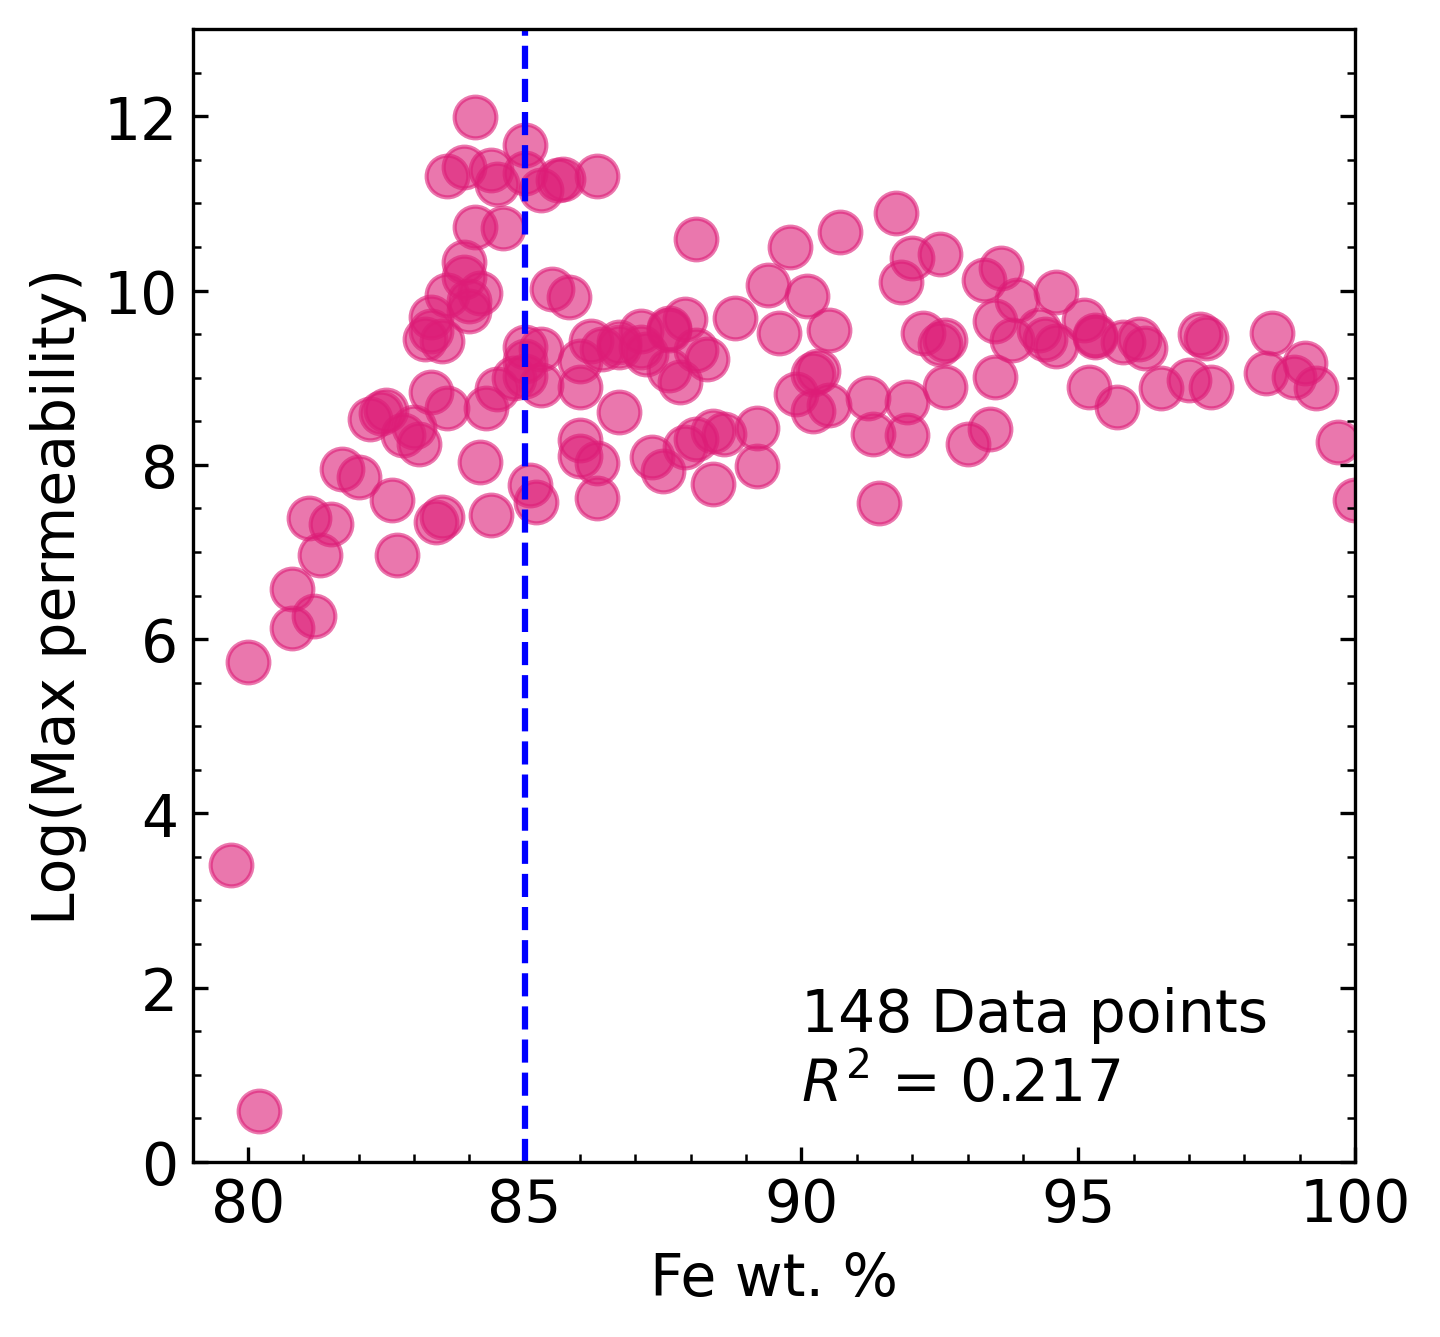

In [130]:
fig, ax = plt.subplots()
plt.scatter(x, y, s=100, color ='#dd1c77', alpha=0.6, label=None)
plt.label='{0:.0f} Data points'.format(non_zero_count)
plt.xlabel('Fe wt. %')
ax.text(90, 1.5, s='{0:.0f} Data points'.format(non_zero_count))
ax.text(90, 0.7, s='$R^2$ = {0:.3f}'.format(coef))
ax.axvline(x=85, linestyle='--', color='blue')
plt.ylabel('Log(Max permeability)')
plt.tick_params()
plt.xlim((79,100))
plt.ylim((0,13))
plt.minorticks_on()
plt.tick_params(direction='in', which='major', right=True)
plt.tick_params(direction='in', which='minor', left=True, right=True)

# Coercivity

In [192]:
C = ds[['Si', 'Al', 'Fe', 'Coercivity']]
C = C.dropna(axis=0, how='any')


In [193]:
x = C['Fe']
y = C['Coercivity']
non_zero_count = len(x)

In [195]:
coef, p = spearmanr(C['Fe'], C['Coercivity'])
print(coef)

0.5465793439037426


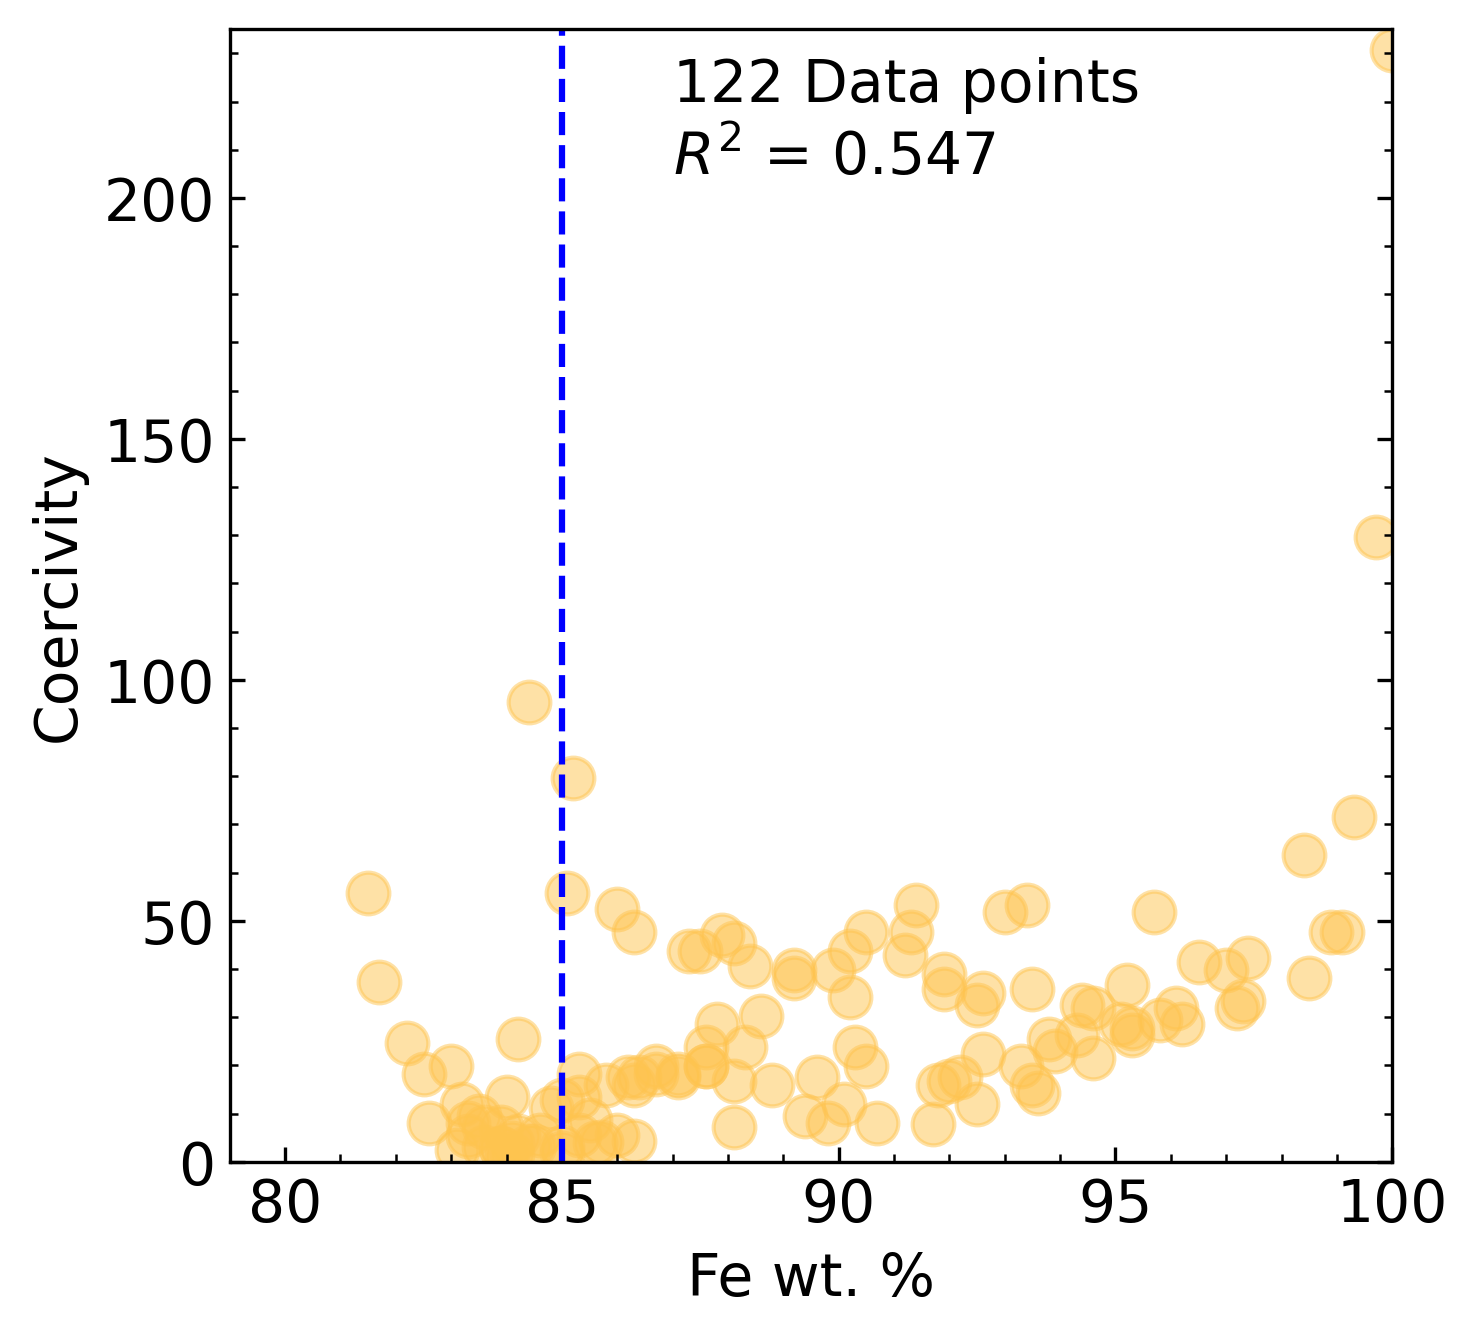

In [198]:
fig, ax = plt.subplots()
plt.scatter(x, y, s=100, color ='#fec44f', alpha=0.5, label=None)
plt.label='{0:.0f} Data points'.format(non_zero_count)
plt.xlabel('Fe wt. %')
ax.text(87, 220, s='{0:.0f} Data points'.format(non_zero_count))
ax.text(87, 205, s='$R^2$ = {0:.3f}'.format(coef))
ax.axvline(x=85, linestyle='--', color='blue')
plt.ylabel('Coercivity')
plt.tick_params()
plt.xlim((79,100))
plt.ylim((0,235))
plt.minorticks_on()
plt.tick_params(direction='in', which='major', right=True)
plt.tick_params(direction='in', which='minor', left=True, right=True)

# Resistivity

In [169]:
R = ds[['Si', 'Al', 'Fe', 'Resistivity']]
R = R.dropna(axis=0, how='any')

In [180]:
x = R['Fe']
y = R['Resistivity']
non_zero_count = len(x)

In [181]:
coef, p = spearmanr(R['Fe'], R['Resistivity'])
print(coef)

-0.6391713582782512


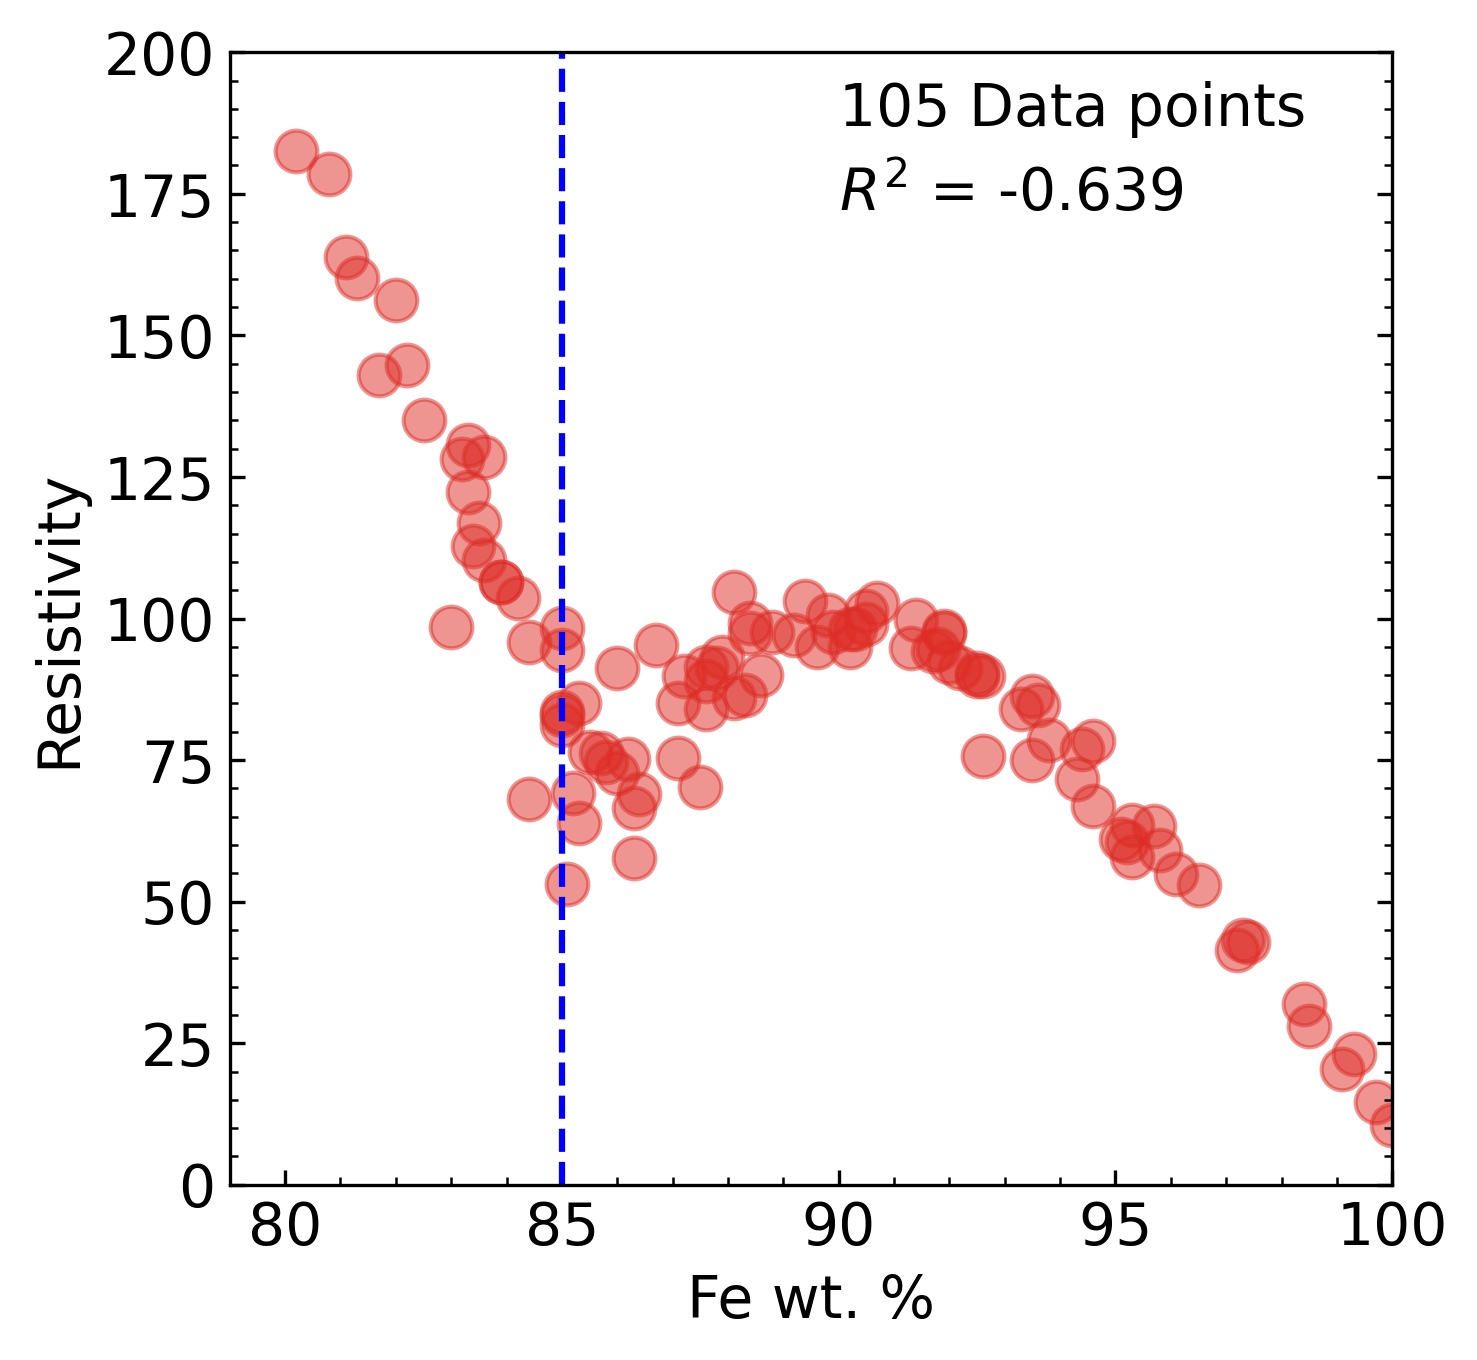

In [190]:
fig, ax = plt.subplots()
plt.scatter(x, y, s=100, color ='#de2d26', alpha=0.5, label=None)
plt.label='{0:.0f} Data points'.format(non_zero_count)
plt.xlabel('Fe wt. %')
ax.text(90, 187, s='{0:.0f} Data points'.format(non_zero_count))
ax.text(90, 172, s='$R^2$ = {0:.3f}'.format(coef))
ax.axvline(x=85, linestyle='--', color='blue')
plt.ylabel('Resistivity')
plt.tick_params()
plt.xlim((79,100))
plt.ylim((0,200))
plt.minorticks_on()
plt.tick_params(direction='in', which='major', right=True)
plt.tick_params(direction='in', which='minor', left=True, right=True)